# AIR Quality Analysis using Python

In [2]:
import requests 
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [3]:
# Get the API key from Open weather map
API_KEY ='6f9815025eb510cb665162b54918ed8c'
CITY='Mysore'# set the city according to your choice

In [4]:

def fetch_aqi_data(api_key,city,start,end):
    geo_url=f'http://api.openweathermap.org/geo/1.0/direct?q={city}&limit=1&appid={api_key}'
    geo_response=requests.get(geo_url)
    geo_data=geo_response.json()
    if len(geo_data)==0:
        raise ValueError(f"city {city} not found")

    lat=geo_data[0]['lat']
    lon=geo_data[0]['lon']

    url=f'http://api.openweathermap.org/data/2.5/air_pollution/history?lat={lat}&lon={lon}&start={start}&end={end}&appid={api_key}'
    response=requests.get(url)
    data=response.json()
    return data

end_time=int(datetime.datetime.now().timestamp())
start_time=end_time-(7*24*60*60)#7days

#fetch
aqi_data=fetch_aqi_data(API_KEY,CITY,start_time,end_time)
aqi_data

{'coord': {'lon': 76.6554, 'lat': 12.3052},
 'list': [{'main': {'aqi': 1},
   'components': {'co': 417.23,
    'no': 1.45,
    'no2': 6.85,
    'o3': 50.07,
    'so2': 3.93,
    'pm2_5': 4.54,
    'pm10': 6.2,
    'nh3': 2.15},
   'dt': 1731477600},
  {'main': {'aqi': 2},
   'components': {'co': 387.19,
    'no': 0.85,
    'no2': 5.74,
    'o3': 63.66,
    'so2': 3.73,
    'pm2_5': 5.47,
    'pm10': 6.72,
    'nh3': 1.76},
   'dt': 1731481200},
  {'main': {'aqi': 2},
   'components': {'co': 383.85,
    'no': 0.46,
    'no2': 6.08,
    'o3': 68.66,
    'so2': 3.76,
    'pm2_5': 6.81,
    'pm10': 7.93,
    'nh3': 1.71},
   'dt': 1731484800},
  {'main': {'aqi': 2},
   'components': {'co': 373.84,
    'no': 0.18,
    'no2': 6.6,
    'o3': 65.09,
    'so2': 3.55,
    'pm2_5': 5.64,
    'pm10': 6.59,
    'nh3': 1.57},
   'dt': 1731488400},
  {'main': {'aqi': 1},
   'components': {'co': 373.84,
    'no': 0.03,
    'no2': 8.23,
    'o3': 53.64,
    'so2': 3.73,
    'pm2_5': 4.33,
    'pm10': 5

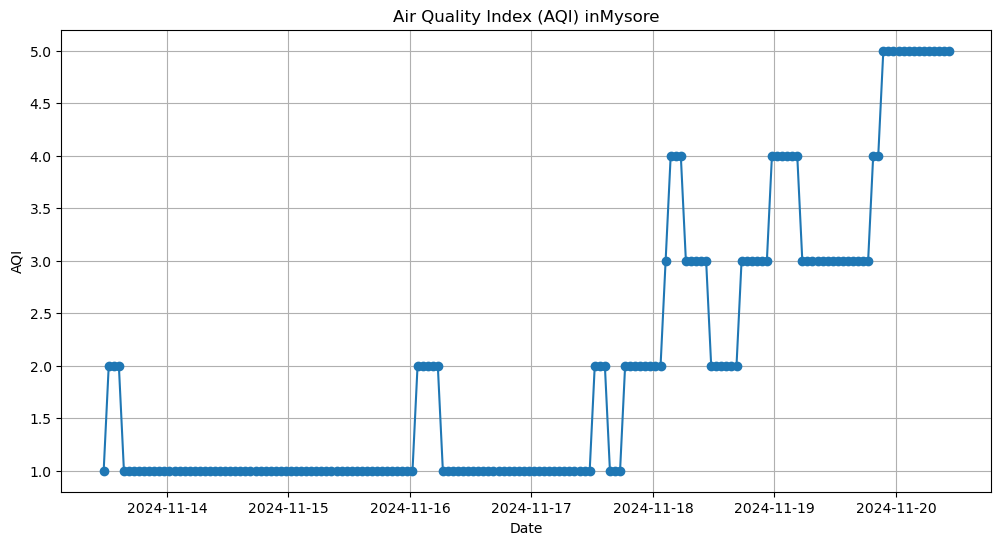

In [5]:
def process_aqi_data(data):
    records = []
    for item in data['list']:
        dt = datetime.datetime.fromtimestamp(item['dt'])
        aqi = item['main']['aqi']
        components = item['components']
        record = {
            'datetime': dt,
            'aqi' : aqi,
            **components
        }
        records.append(record)
    return pd.DataFrame(records)

aqi_df = process_aqi_data(aqi_data)

#plot AQI over time
plt.figure(figsize=(12,6))
plt.plot(aqi_df['datetime'], aqi_df['aqi'], marker='o', linestyle='-')
plt.title(f'Air Quality Index (AQI) in{CITY}')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.grid(True)
plt.show()

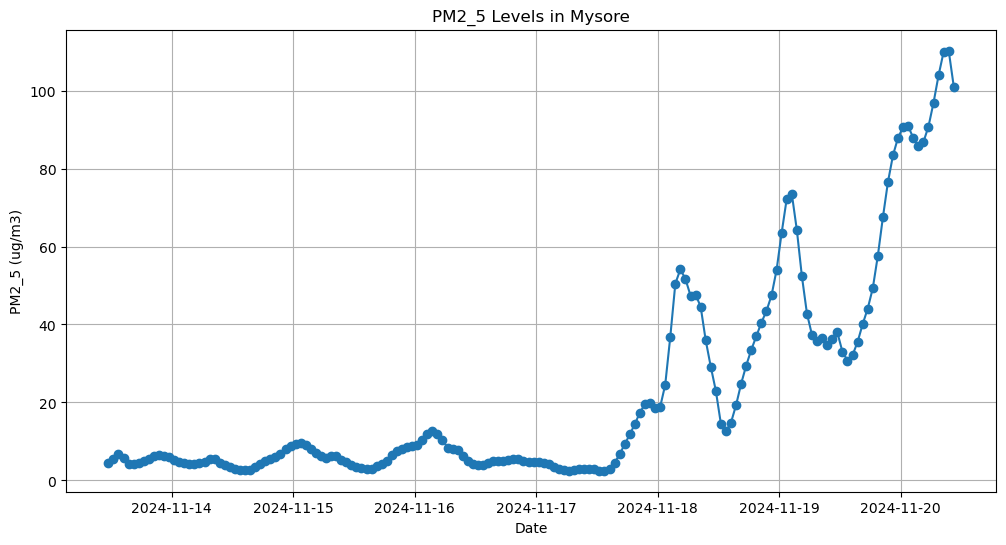

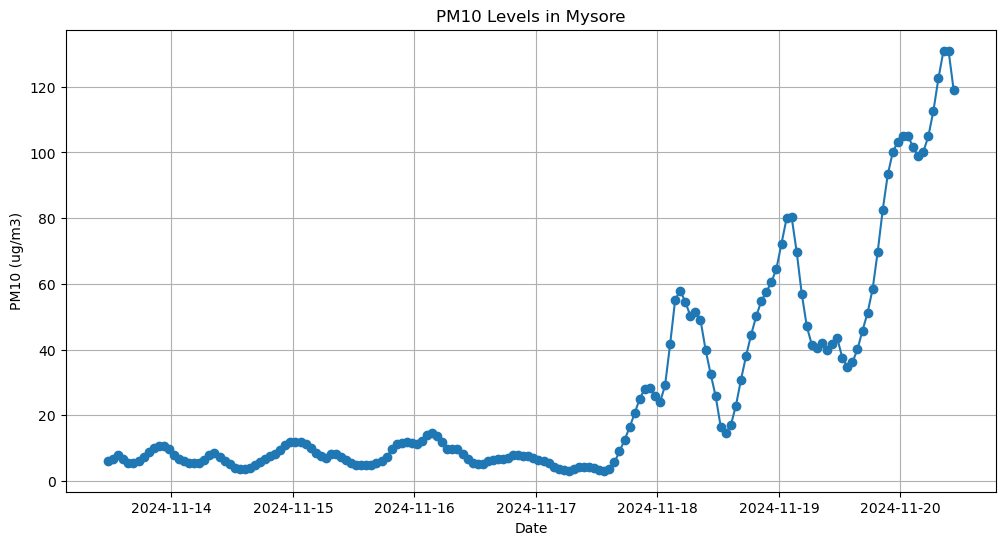

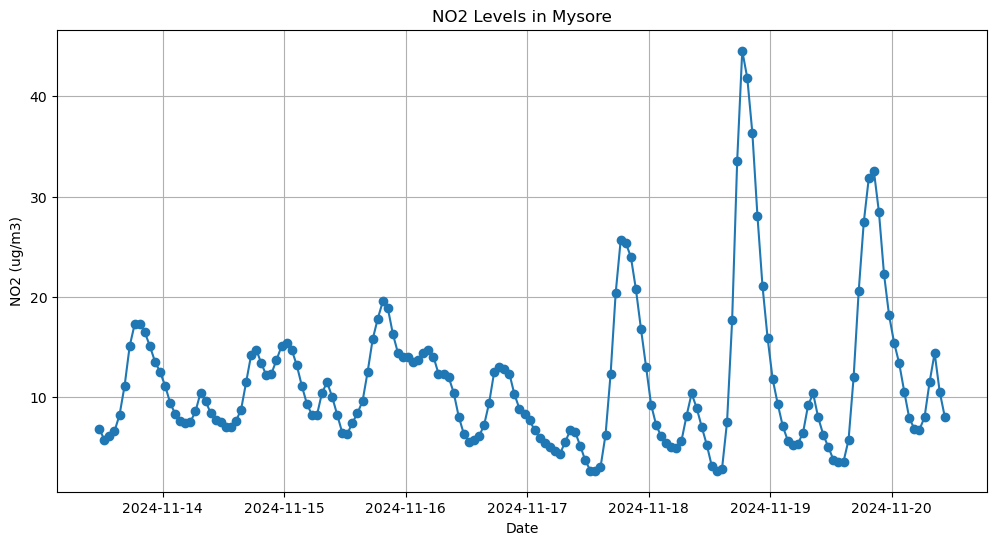

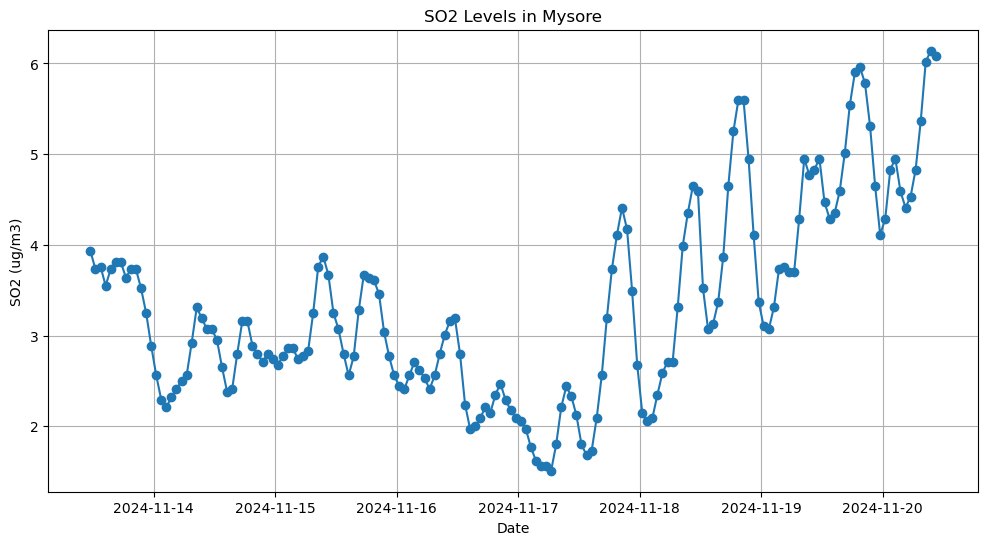

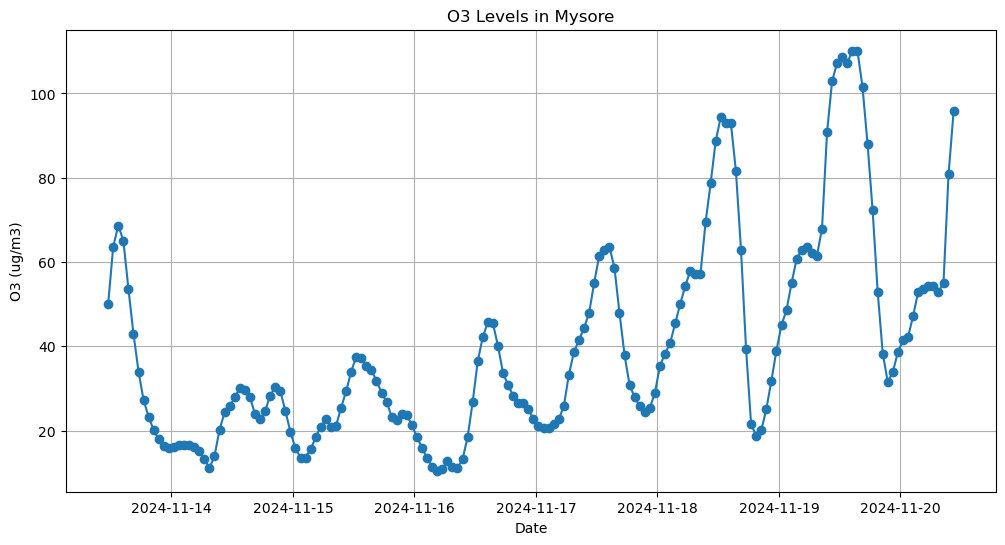

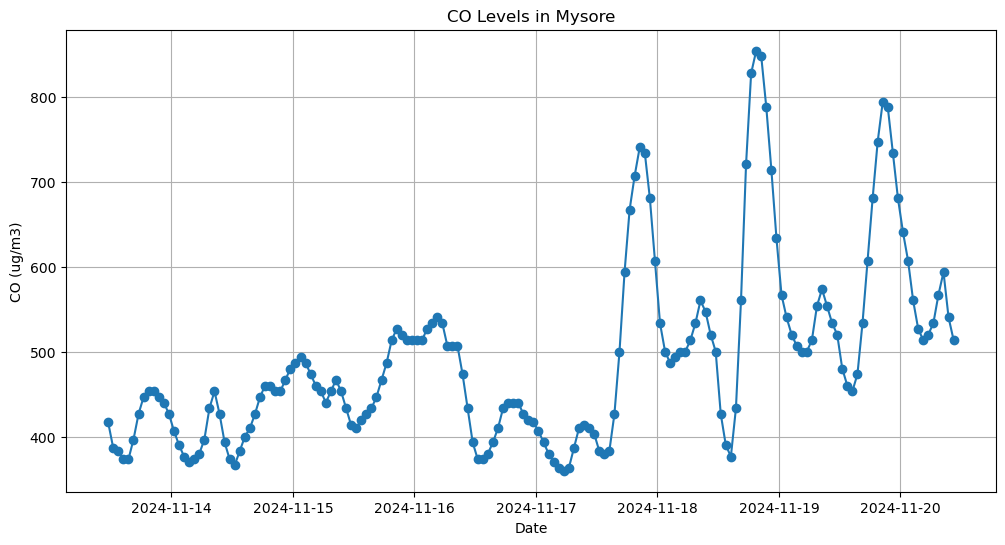

In [6]:
components = ['pm2_5','pm10','no2','so2','o3','co']
for component in components:
    plt.figure(figsize=(12,6))
    plt.plot(aqi_df['datetime'],aqi_df[component],marker='o',linestyle='-')
    plt.title(f'{component.upper()} Levels in {CITY}')
    plt.xlabel('Date')
    plt.ylabel(f'{component.upper()} (ug/m3)')
    plt.grid(True)
    plt.show()

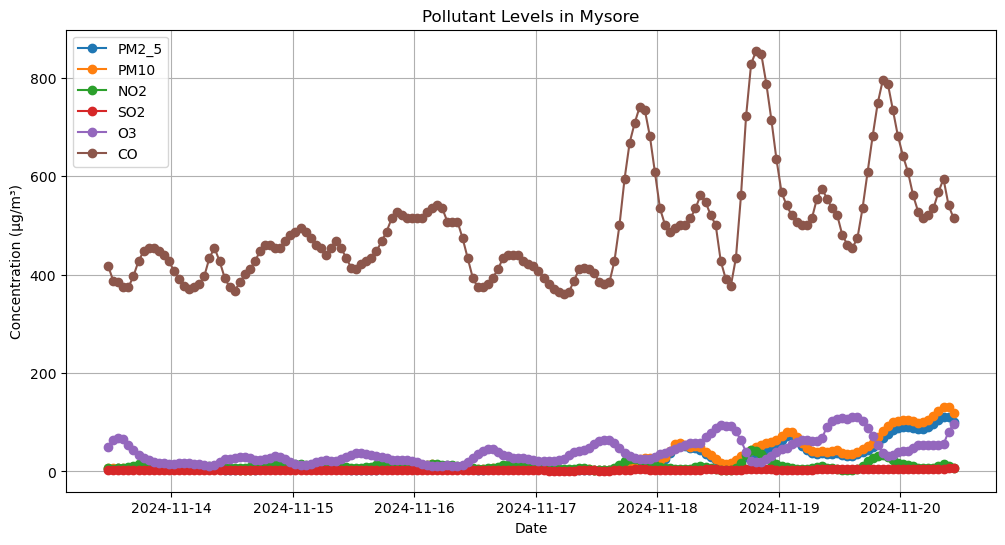

In [7]:
import matplotlib.pyplot as plt

# Assuming components is a list of pollutant column names (e.g., ['pm2_5', 'pm10', 'no2'])
# Assuming aqi_df is a DataFrame with 'datetime' as a column and pollutants as others

plt.figure(figsize=(12, 6))  # Set the figure size

for component in components:
    plt.plot(aqi_df['datetime'], aqi_df[component], marker='o', linestyle='-', label=component.upper())

plt.title(f"Pollutant Levels in {CITY}")  # Use a variable CITY to dynamically update the title
plt.xlabel('Date')
plt.ylabel('Concentration (µg/m³)')
plt.legend()
plt.grid(True)
plt.show()

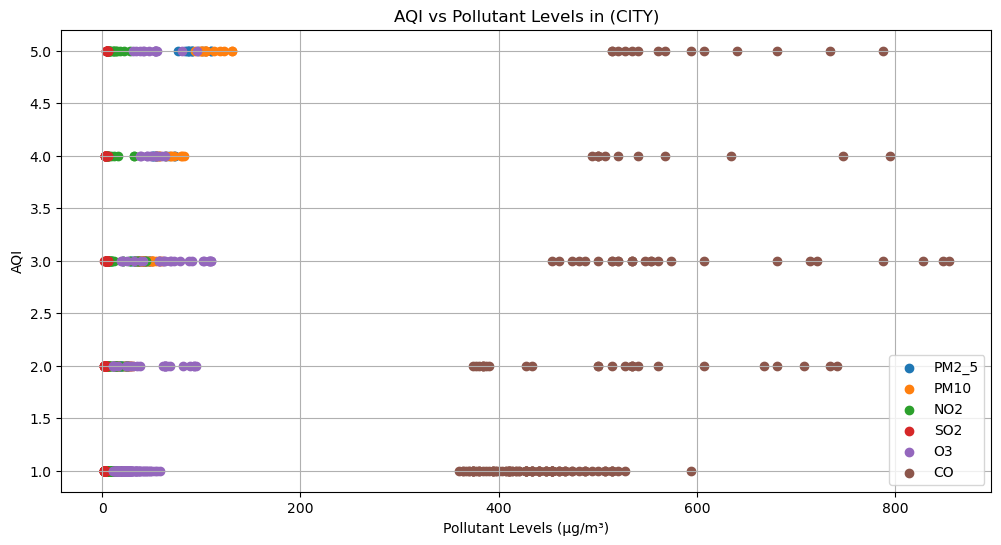

In [8]:
#Plotting multiple components in a single plot for comparison

plt.figure(figsize=(12, 6))

for component in components:

    plt.scatter(aqi_df[component], aqi_df['aqi'],label=component.upper())

plt.title(f'AQI vs Pollutant Levels in (CITY)')

plt.xlabel('Pollutant Levels (µg/m³)')

plt.ylabel('AQI')

plt.legend()

plt.grid(True)

plt.show()

### To summarise I have imported the required libraries like pandas, requests and datetime. signed up at open weather map website and the API key which is free version. Later used the api key and city name, created a custom function and did the data analysis with retrieving the data like particle matter and components( Oxygen, Carbon monooxide and others).Finally Visualized the data with respect to components and AQI in Mysuru, Karnataka region.

#### coded by Harsha H C